In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.get_option("display.max_rows")
import scipy.stats as stats
from scipy.stats import ttest_ind

In [2]:
pwd

'C:\\Users\\D..E..L..L'

In [3]:
cd E:/Durham/Semester 1/AIDI 1002- AI Algorithms I/LAB1

E:\Durham\Semester 1\AIDI 1002- AI Algorithms I\LAB1


In [4]:
df=pd.read_csv("flights.csv")
df.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01T05:00:00Z
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01T05:00:00Z
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01T05:00:00Z
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01T05:00:00Z
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01T06:00:00Z


# Task 1: Exploratory data analysis

In [5]:
#Number of rows and columns in the dataset
df.shape

(336776, 19)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            336776 non-null  int64  
 1   month           336776 non-null  int64  
 2   day             336776 non-null  int64  
 3   dep_time        328521 non-null  float64
 4   sched_dep_time  336776 non-null  int64  
 5   dep_delay       328521 non-null  float64
 6   arr_time        328063 non-null  float64
 7   sched_arr_time  336776 non-null  int64  
 8   arr_delay       327346 non-null  float64
 9   carrier         336776 non-null  object 
 10  flight          336776 non-null  int64  
 11  tailnum         334264 non-null  object 
 12  origin          336776 non-null  object 
 13  dest            336776 non-null  object 
 14  air_time        327346 non-null  float64
 15  distance        336776 non-null  int64  
 16  hour            336776 non-null  int64  
 17  minute    

In [7]:
df.describe()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute
count,336776.0,336776.000000,336776.000000,328521.000000,336776.000000,328521.000000,328063.000000,336776.000000,327346.000000,336776.000000,327346.000000,336776.000000,336776.000000,336776.000000
mean,2013.0,6.548510,15.710787,1349.109947,1344.254840,12.639070,1502.054999,1536.380220,6.895377,1971.923620,150.686460,1039.912604,13.180247,26.230100
std,0.0,3.414457,8.768607,488.281791,467.335756,40.210061,533.264132,497.457142,44.633292,1632.471938,93.688305,733.233033,4.661316,19.300846
min,2013.0,1.000000,1.000000,1.000000,106.000000,-43.000000,1.000000,1.000000,-86.000000,1.000000,20.000000,17.000000,1.000000,0.000000
25%,2013.0,4.000000,8.000000,907.000000,906.000000,-5.000000,1104.000000,1124.000000,-17.000000,553.000000,82.000000,502.000000,9.000000,8.000000
50%,2013.0,7.000000,16.000000,1401.000000,1359.000000,-2.000000,1535.000000,1556.000000,-5.000000,1496.000000,129.000000,872.000000,13.000000,29.000000
75%,2013.0,10.000000,23.000000,1744.000000,1729.000000,11.000000,1940.000000,1945.000000,14.000000,3465.000000,192.000000,1389.000000,17.000000,44.000000
max,2013.0,12.000000,31.000000,2400.000000,2359.000000,1301.000000,2400.000000,2359.000000,1272.000000,8500.000000,695.000000,4983.000000,23.000000,59.000000


In [8]:
#Missing values in the dataset
df.isnull()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,False,False,False,True,False,True,True,False,True,False,False,True,False,False,True,False,False,False,False
336772,False,False,False,True,False,True,True,False,True,False,False,True,False,False,True,False,False,False,False
336773,False,False,False,True,False,True,True,False,True,False,False,False,False,False,True,False,False,False,False
336774,False,False,False,True,False,True,True,False,True,False,False,False,False,False,True,False,False,False,False


In [9]:
#Number of missing values in each column
print(df.isnull().sum())

year                 0
month                0
day                  0
dep_time          8255
sched_dep_time       0
dep_delay         8255
arr_time          8713
sched_arr_time       0
arr_delay         9430
carrier              0
flight               0
tailnum           2512
origin               0
dest                 0
air_time          9430
distance             0
hour                 0
minute               0
time_hour            0
dtype: int64


In [95]:
df1=df.dropna()
df1

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01T05:00:00Z
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01T05:00:00Z
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01T05:00:00Z
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01T05:00:00Z
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01T06:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336765,2013,9,30,2240.0,2245,-5.0,2334.0,2351,-17.0,B6,1816,N354JB,JFK,SYR,41.0,209,22,45,2013-09-30T22:00:00Z
336766,2013,9,30,2240.0,2250,-10.0,2347.0,7,-20.0,B6,2002,N281JB,JFK,BUF,52.0,301,22,50,2013-09-30T22:00:00Z
336767,2013,9,30,2241.0,2246,-5.0,2345.0,1,-16.0,B6,486,N346JB,JFK,ROC,47.0,264,22,46,2013-09-30T22:00:00Z
336768,2013,9,30,2307.0,2255,12.0,2359.0,2358,1.0,B6,718,N565JB,JFK,BOS,33.0,187,22,55,2013-09-30T22:00:00Z


# Task 2: Statistics

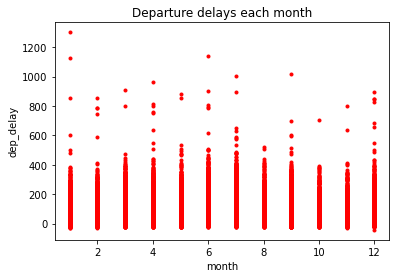

In [96]:
plt.xlabel('month')
plt.ylabel('dep_delay')
plt.title('Departure delays each month')
plt.scatter(df1.month,df1.dep_delay,color='red',marker='.')
plt.show()

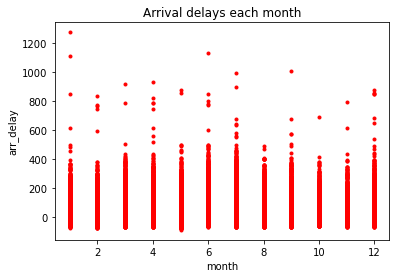

In [97]:
plt.xlabel('month')
plt.ylabel('arr_delay')
plt.title('Arrival delays each month')
plt.scatter(df1.month,df1.arr_delay,color='red',marker='.')
plt.show()

# Task 3: Creating a new dataset

In [98]:
df2=df1.drop(['year','month','day','dep_time','sched_dep_time','dep_delay','arr_time','sched_arr_time','flight',
                 'tailnum','origin','dest','air_time','distance','hour','minute','time_hour'],axis=1)
df2            

,arr_delay,carrier
0,11.0,UA
1,20.0,UA
2,33.0,AA
3,-18.0,B6
4,-25.0,DL
...,...,...
336765,-17.0,B6
336766,-20.0,B6
336767,-16.0,B6
336768,1.0,B6


In [99]:
df3=df2[df2['carrier'].isin(['UA','DL'])]
df3

,arr_delay,carrier
0,11.0,UA
1,20.0,UA
4,-25.0,DL
5,12.0,UA
12,7.0,UA
...,...,...
336728,-13.0,UA
336737,-25.0,UA
336744,-25.0,DL
336755,-23.0,UA


In [100]:
s0=df3.carrier[df3.carrier.eq('UA')].sample(20000).index
s1=df3.carrier[df3.carrier.eq('DL')].sample(20000).index
pop_data=df3.loc[s0.union(s1)]
pop_data

,arr_delay,carrier
12,7.0,UA
13,-14.0,UA
32,1.0,UA
45,-18.0,UA
62,5.0,DL
...,...,...
336679,-26.0,UA
336685,40.0,UA
336694,-23.0,UA
336702,-23.0,UA


# Task 4: Creating 2 new dataset 'DL' and 'UA'

In [101]:
df4=pop_data[pop_data['carrier'].isin(['DL'])]
df4

,arr_delay,carrier
62,5.0,DL
93,3.0,DL
101,-2.0,DL
104,-30.0,DL
105,8.0,DL
...,...,...
336651,-11.0,DL
336662,-4.0,DL
336667,-20.0,DL
336670,-11.0,DL


In [102]:
dl=df4.sample(1000)
dl

,arr_delay,carrier
325630,-22.0,DL
16128,0.0,DL
68744,-30.0,DL
288675,-9.0,DL
335706,7.0,DL
...,...,...
7816,-40.0,DL
46864,-11.0,DL
284437,-7.0,DL
87214,-33.0,DL


In [103]:
df5=pop_data[pop_data['carrier'].isin(['UA'])]
df5

,arr_delay,carrier
12,7.0,UA
13,-14.0,UA
32,1.0,UA
45,-18.0,UA
76,-4.0,UA
...,...,...
336618,-25.0,UA
336679,-26.0,UA
336685,40.0,UA
336694,-23.0,UA


In [104]:
ua=df5.sample(1000)
ua

,arr_delay,carrier
2013,26.0,UA
95077,14.0,UA
300707,17.0,UA
256658,-15.0,UA
229597,-13.0,UA
...,...,...
181370,29.0,UA
181900,-7.0,UA
103424,90.0,UA
181113,-9.0,UA


# Task 5: Creating a new dataset 'samples'

In [105]:
df6=[ua,dl]
df6
samples=pd.concat(df6)
samples

,arr_delay,carrier
2013,26.0,UA
95077,14.0,UA
300707,17.0,UA
256658,-15.0,UA
229597,-13.0,UA
...,...,...
7816,-40.0,DL
46864,-11.0,DL
284437,-7.0,DL
87214,-33.0,DL


# Task 6: Calculating standard error

In [106]:
meandl=(dl.mean())
stddl=(dl.std())
SE=(dl.sem(axis=0))

In [107]:
meandl

arr_delay    0.808
dtype: float64

In [108]:
stddl

arr_delay    47.068977
dtype: float64

In [109]:
SE

arr_delay    1.488452
dtype: float64

In [110]:
meanua=(ua.mean())
stdua=(ua.std())
SE1=(ua.sem(axis=0))

In [111]:
meanua

arr_delay    2.129
dtype: float64

In [112]:
stdua

arr_delay    40.272152
dtype: float64

In [113]:
SE1

arr_delay    1.273517
dtype: float64

# Task 7: Calculating Lower & Upper Values

In [114]:
lowervaluedl = meandl - 1.96*SE
lowervaluedl

arr_delay   -2.109365
dtype: float64

In [115]:
uppervaluedl= meandl+1.96*SE
uppervaluedl

arr_delay    3.725365
dtype: float64

In [116]:
lowervalueua=meanua-1.96*SE1
lowervalueua

arr_delay   -0.367094
dtype: float64

In [117]:
uppervalueua=meanua+1.96*SE1
uppervalueua

arr_delay    4.625094
dtype: float64

In [118]:
DLmeans=print(meandl,lowervaluedl,uppervaluedl)

arr_delay    0.808
dtype: float64 arr_delay   -2.109365
dtype: float64 arr_delay    3.725365
dtype: float64


In [119]:
UAmeans=print(meanua,lowervalueua,uppervalueua)

arr_delay    2.129
dtype: float64 arr_delay   -0.367094
dtype: float64 arr_delay    4.625094
dtype: float64


In [120]:
t_stat,p_val=stats.ttest_ind(samples['arr_delay'][(samples['carrier']=='UA')], samples['arr_delay'][(samples['carrier']=='DL')])

In [121]:
t_stat

0.6743540495576105

In [122]:
p_val

0.5001642630656311

# T stat and P value suggest that there is a statistically significant difference between the arrival delay times of United flights and Delta flights

# Based on the calculations of the samples, we can say that United flights are delayed more than the Delta flights as the mean value of the samples is greater for United 